# Introduction
- Please make sure to define your algorithm within a function. This will help from our variables interfering with eachother since they will not be definined globally.
- Have your function call return
  - confusion matrix
  - prediction accuracy
  - ROC curve + AUC (may not apply to all models?)


In [ ]:
""" --- Install Packages ---
Run this once when notebook is opened or when new packages are added
Use "%" to execute python terminal command
"""
%pip install ucimlrepo

In [ ]:
""" --- Import Packages ---
"""
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
import itertools

In [ ]:
""" --- Import Heart Data ---
From: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
______________________________________________________________________________
Variable                  Type	      Description
______________________________________________________________________________
FEATURES
------------------------------------------------------------------------------
age	                      Integer	    age of the patient
anaemia	                  Binary		  decrease of red blood cells or hemoglobin
creatinine_phosphokinase	Integer		  level of the CPK enzyme in the blood
diabetes	                Binary		  if the patient has diabetes
ejection_fraction	        Integer		  percentage of blood leaving the heart at each contraction
high_blood_pressure	      Binary		  if the patient has hypertension
platelets	                Continuous	platelets in the blood	kiloplatelets/mL
serum_creatinine	      	Continuous	level of serum creatinine in the blood	mg/dL
serum_sodium              Integer		  level of serum sodium in the blood	mEq/L
sex	                    	Binary	    Sex	woman or man
smoking                   Binary		  if the patient smokes or not
time	                  	Integer		  follow-up period	days
------------------------------------------------------------------------------
TARGET
------------------------------------------------------------------------------
death_event	              Binary		  if the patient died during the follow-up period
______________________________________________________________________________
"""
def import_data(split=0.3, seed = 0):
  """
  description:
    imports heart dataset and structures into standard train-test sets
  param:
    split: percent of data used for testing
    seed: random number seed to make sampling repeatable
  return:
    X_train: training features | X_test: testing features
    y_train: training target   | y_test: testing target
  """
  # fetch dataset
  heart_failure_clinical_records = fetch_ucirepo(id=519)

  # data (as pandas dataframes)
  X = (heart_failure_clinical_records.data.features).to_numpy()
  y = (heart_failure_clinical_records.data.targets).to_numpy()

  # Split into train and test sets and return
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=seed)
  return X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = import_data()

def import_data_kfolds(k=4, seed =0):
  """
  description:
    imports heart dataset and structures into k train-test sets
  param:
    split: percent of data used for testing
    seed: random number seed to make sampling repeatable
  return:
    List of dictionaries containing k train-test splits
      X_train: training features | X_test: testing features
      y_train: training target   | y_test: testing target
  """
  # fetch dataset -----------------------------------
  heart_failure_clinical_records = fetch_ucirepo(id=519)

  # data (as pandas dataframes) ---------------------
  X = (heart_failure_clinical_records.data.features).to_numpy()
  y = (heart_failure_clinical_records.data.targets).to_numpy()

  # Shuffle data -------------------------------------
  data = np.hstack([X,y]) # pair features and target
  np.random.seed(seed); np.random.shuffle(data) # shuffle data
  X = data[:,:-1]; y = data[:,-1]; # recover feature and target vectors

  # Split into k-folds -------------------------------
  # kf = KFold(n_splits=k)
  # FOLDS = [] # loop through and get fold data
  # for i, (train_index, test_index) in enumerate(kf.split(X)):
  #   fold = {'X_train': X[train_index,:], 'X_test': X[test_index,:],
  #           'y_train': y[train_index],   'y_test': y[test_index] }
  #   FOLDS.append(fold)

  # Split into k-folds (stratified) -------------------
  skf = StratifiedKFold(n_splits=k)
  FOLDS = [] # loop through and get fold data
  for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    fold = {'X_train': X[train_index,:], 'X_test': X[test_index,:],
            'y_train': y[train_index],   'y_test': y[test_index] }
    FOLDS.append(fold)

  return FOLDS

# --- Usage of K-Folds Import ---
FOLDS = import_data_kfolds()
for ifold,fold in enumerate(FOLDS):
  X_train = fold['X_train']
  X_test = fold['X_test']
  y_train = fold['y_train']
  y_test = fold['y_test']
  # accuracy, CM = KNN(X_train, X_test, y_train, y_test, k_values):

  print(f'Fold {ifold}')
  print(f'\tShape of X_train: {np.shape(X_train)}')
  print(f'\tShape of X_test:  {np.shape(X_test)}' )
  print(f'\tShape of y_train: {np.shape(y_train)}')
  print(f'\tShape of y_test:  {np.shape(y_test)}' )

  print(f'\t% Class 1 (train): {round(np.mean(y_train),2)}')
  print(f'\t% Class 1 (test):  {round(np.mean(y_test),2)}')


Fold 0
	Shape of X_train: (224, 12)
	Shape of X_test:  (75, 12)
	Shape of y_train: (224,)
	Shape of y_test:  (75,)
	% Class 1 (train): 0.32
	% Class 1 (test):  0.32
Fold 1
	Shape of X_train: (224, 12)
	Shape of X_test:  (75, 12)
	Shape of y_train: (224,)
	Shape of y_test:  (75,)
	% Class 1 (train): 0.32
	% Class 1 (test):  0.32
Fold 2
	Shape of X_train: (224, 12)
	Shape of X_test:  (75, 12)
	Shape of y_train: (224,)
	Shape of y_test:  (75,)
	% Class 1 (train): 0.32
	% Class 1 (test):  0.32
Fold 3
	Shape of X_train: (225, 12)
	Shape of X_test:  (74, 12)
	Shape of y_train: (225,)
	Shape of y_test:  (74,)
	% Class 1 (train): 0.32
	% Class 1 (test):  0.32


In [ ]:
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix
def plot_confusion_matrix(CM, title):
    class_names = ['Alive','Dead']
    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(CM, classes=class_names, title=title)
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(CM, classes=class_names, normalize=True, title=f'{title} (Normalized)')
    plt.show()
def plot_roc_curve(y_obs,P_y1_pred,label=None,ax=None):
  """
  param: y_obs: true class labels [0,1]
  param: P_y1_pred: probability of predicting positive class P(y=1) for each datapoint
  """
  from sklearn.metrics import roc_curve,auc
  if ax is None: fig,ax = plt.subplots(1,1,figsize=(8, 6))

  fpr, tpr, thresholds = roc_curve(y_obs, P_y1_pred)
  roc_auc = auc(fpr, tpr)

  ax.plot(fpr, tpr, label=f'{label} (AUC = %0.2f)' % roc_auc)
  ax.plot([0, 1], [0, 1], 'r--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.0])
  ax.set_title('Receiver Operating Characteristic (ROC) Curve')
  ax.set_xlabel('False Positive Rate (FPR)')
  ax.set_ylabel('True Positive Rate (TPR)')
  plt.legend(loc='lower right')
  return ax


# ALG 1: MLP Classifier


In [ ]:
# Search for best model --------------------------------------------
def MLP_search(X_train, X_test, y_train, y_test):
  parameter_space = {
      'hidden_layer_sizes': [(200,), (200,10,), (150,)], # (150,100,50),
      'activation': ['tanh','logistic'],
      # 'solver': ['sgd', 'adam'],
      # 'alpha': [0.0001, 0.001], #  0.05
      # 'learning_rate': ['constant','adaptive'],
  }
  from sklearn.neural_network import MLPClassifier
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.model_selection import GridSearchCV

  y_test = y_test.ravel()
  y_train = y_train.ravel()

  # Scale data
  sc=StandardScaler()
  scaler = sc.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Define MLP Classifier
  N_test = np.size(y_test)
  mlp = MLPClassifier(
      random_state=1,
      max_iter = 300,
      solver='sgd',
      alpha = 0.0001,
      learning_rate= 'constant'
      )

  # Search parameter space
  clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
  clf.fit(X_train_scaled, y_train)
  print(f'Best Results:\n {clf.best_params_}')


X_train, X_test, y_train, y_test = import_data()
MLP_search(X_train, X_test, y_train, y_test)

Best Results:
 {'activation': 'tanh', 'hidden_layer_sizes': (200,)}


Confusion matrix, without normalization


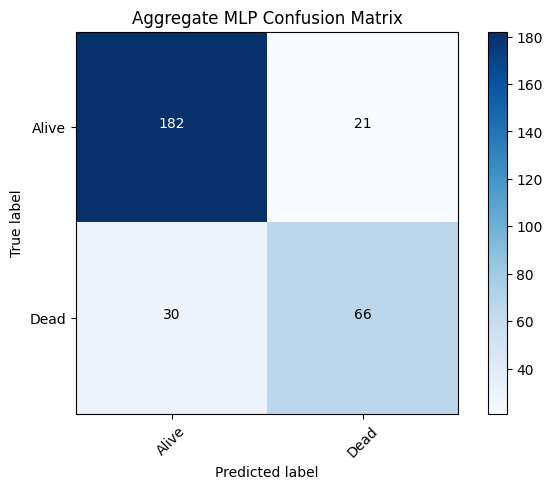

Normalized confusion matrix


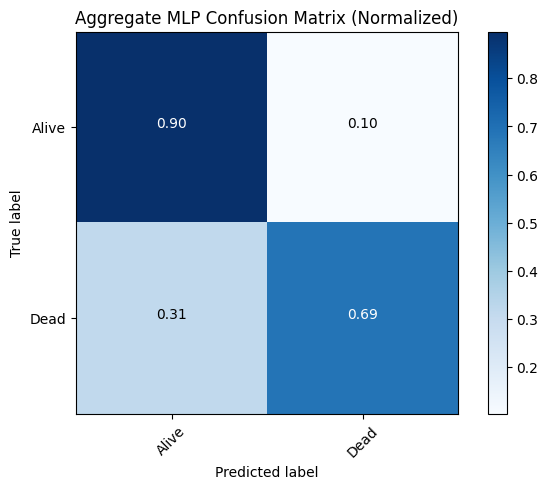


 Accuracy (μ ± σ) = 0.83 ± 0.03


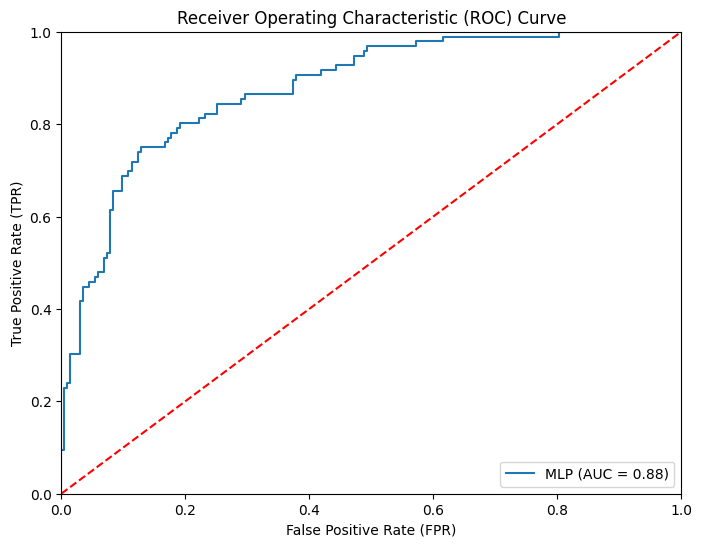

In [ ]:
from sklearn.metrics import roc_curve,auc
# MLP Classifier Function ------------------------------------------
def MLP(X_train, X_test, y_train, y_test):
  from sklearn.neural_network import MLPClassifier
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix

  y_test = y_test.ravel()
  y_train = y_train.ravel()

  # Scale data
  sc=StandardScaler()
  scaler = sc.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Train MLP Classifier
  # MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
  N_test = np.size(y_test)
  clf = MLPClassifier(random_state=1,
                      hidden_layer_sizes=(200,),
                      max_iter = 300,
                      activation = 'tanh', #'logistic',
                      solver = 'sgd', # 'adam',
                      alpha = 0.0001,
                      learning_rate = 'constant'
                      ).fit(X_train_scaled, y_train)

  # Predict
  y_pred_prob = clf.predict_proba(X_test_scaled) # probability estimates (thresholding)
  y_pred = clf.predict(X_test_scaled) # binary prediction

  # Report
  accuracy = accuracy_score(y_test, y_pred)
  CM = confusion_matrix(y_test,y_pred)
  return accuracy,CM,y_pred,y_pred_prob


# Train and Test for all K-folds -----------------------------------
acc_ifold = []
CM_ifold = []
y_pred_ifold = []
Pypos_ifold = []
y_true_ifold = []
for ifold,fold in enumerate(FOLDS):
  # Train and test this fold
  X_train = fold['X_train']
  X_test = fold['X_test']
  y_train = fold['y_train']
  y_test = fold['y_test']
  accuracy,CM,y_pred,Probs = MLP(X_train, X_test, y_train, y_test)

  # Report fold
  # print(f'\n--- Fold {ifold+1} ---')
  # print(f'Accuracy: {accuracy}')
  # print(f'CM:\n {CM}')

  # Store fold data
  acc_ifold.append(accuracy)
  CM_ifold.append(CM)
  Pypos_ifold += Probs[:,1].tolist()
  y_pred_ifold += y_pred.tolist()
  y_true_ifold += y_test.tolist()

# Report Results -----------------------------------
plot_confusion_matrix(sum(CM_ifold),title="Aggregate MLP Confusion Matrix")
acc_mean = np.mean(acc_ifold)
acc_std = np.std(acc_ifold)
print(f'\n Accuracy (μ ± σ) = {round(acc_mean,2)} ± {round(acc_std,2)}')


#Plotting ROC curve with AUC value
ax_ROC = plot_roc_curve(y_true_ifold,Pypos_ifold,label='MLP')

## **Logistic Regression Model**

Fold 1
AUC: 0.8120915032679739
Accuracy: 0.7466666666666667
Confusion Matrix:
 [[47  4]
 [15  9]]


Fold 2
AUC: 0.9093137254901961
Accuracy: 0.84
Confusion Matrix:
 [[46  5]
 [ 7 17]]


Fold 3
AUC: 0.9117647058823529
Accuracy: 0.84
Confusion Matrix:
 [[43  8]
 [ 4 20]]


Fold 4
AUC: 0.8591666666666667
Accuracy: 0.8243243243243243
Confusion Matrix:
 [[47  3]
 [10 14]]




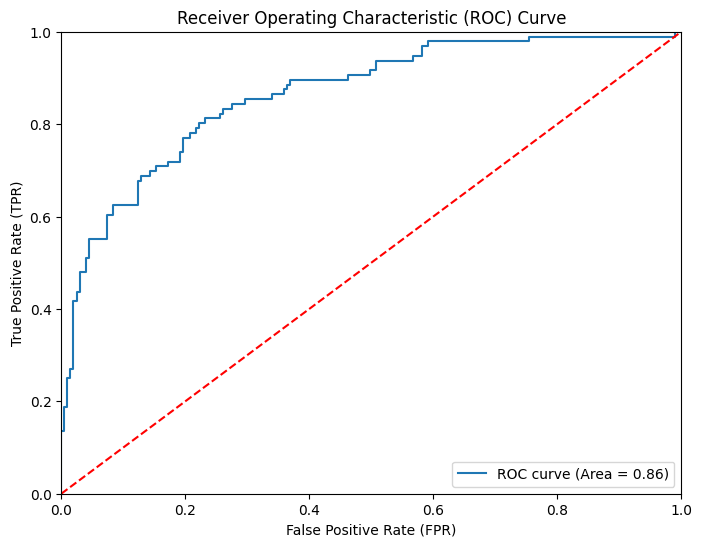

AUC: 0.864429392446634
Accuracy: 0.8127090301003345
Confusion Matrix:
 [[183  20]
 [ 36  60]]


Confusion matrix, without normalization


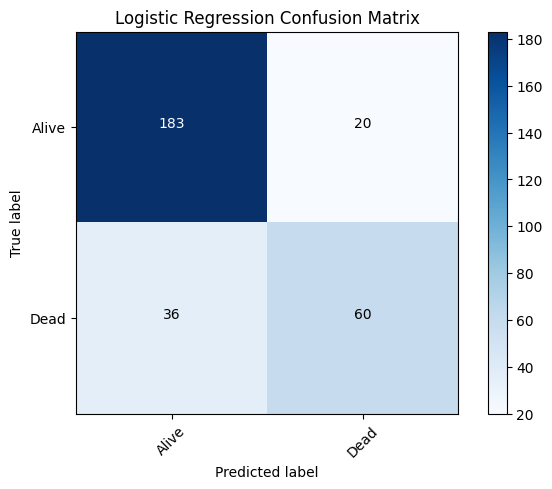

Normalized confusion matrix


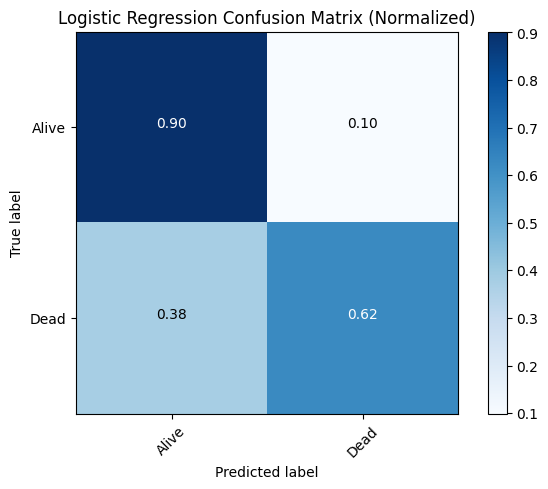

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

combined_true_labels = []
combined_predictions = []

def LogisticReg(X_train, X_test, y_train, y_test):

    #Initialize logistic regression model
    model = LogisticRegression(max_iter=1000)

    #Train logistic regression model
    model.fit(X_train, y_train)

    #Prediction
    y_pred = model.predict_proba(X_test)[:, 1]

    return y_test, y_pred

FOLDS = import_data_kfolds()
for ifold, fold in enumerate(FOLDS):
  X_train = fold['X_train']
  X_test = fold['X_test']
  y_train = fold['y_train']
  y_test = fold['y_test']
  y_test, y_pred = LogisticReg(X_train, X_test, y_train, y_test)

  #All true and predicted values
  combined_true_labels.extend(y_test)
  combined_predictions.extend(y_pred)

  #Convert predictions to Class 1 or Class 0 using a 0.5 threshold
  threshold = 0.5
  binary_predictions = [1 if pred >= threshold else 0 for pred in y_pred]

  #Getting the accuracy and confusion matrix for each fold
  fold_accuracy = accuracy_score(y_test, binary_predictions)
  fold_confusion_matrix = confusion_matrix(y_test, binary_predictions)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  fold_roc_auc = auc(fpr, tpr)

  #Printing AUC, Accuracy, Confusion Matrix for each fold
  print(f'Fold {ifold + 1}')
  print('AUC:', fold_roc_auc)
  print('Accuracy:', fold_accuracy)
  print('Confusion Matrix:\n', fold_confusion_matrix)
  print('\n')

#Convert predictions to Class 1 or Class 0 using a 0.5 threshold
threshold = 0.5
binary_predictions = [1 if pred >= threshold else 0 for pred in combined_predictions]

#Using all predictions and true labels across folds to get accuracy score
overall_accuracy = accuracy_score(combined_true_labels, binary_predictions)

#Using all predictions and true labels across folds to get confusion matrix
overall_confusion_matrix = confusion_matrix(combined_true_labels, binary_predictions)

#Using all predictions and true labels across folds to get ROC
fpr, tpr, thresholds = roc_curve(combined_true_labels, combined_predictions)
overall_roc_auc = auc(fpr, tpr)

#Plotting ROC curve with AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (Area = %0.2f)' % overall_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

#Printing AUC, Accuracy, Confusion Matrix
print('AUC:', overall_roc_auc)
print('Accuracy:', overall_accuracy)
print('Confusion Matrix:\n', overall_confusion_matrix)
print('\n')
plot_confusion_matrix(overall_confusion_matrix, title = "Logistic Regression Confusion Matrix")


# **Decision Tree**

Fold 1:
Accuracy: 0.77
Confusion Matrix:
[[43  8]
 [ 9 15]]
AUC: 0.73
------------------------------
Fold 2:
Accuracy: 0.88
Confusion Matrix:
[[46  5]
 [ 4 20]]
AUC: 0.87
------------------------------
Fold 3:
Accuracy: 0.75
Confusion Matrix:
[[37 14]
 [ 5 19]]
AUC: 0.76
------------------------------
Fold 4:
Accuracy: 0.77
Confusion Matrix:
[[44  6]
 [11 13]]
AUC: 0.71
------------------------------
Average Accuracy across 4 folds: 0.79
Average Confusion Matrix:
[[42.5   8.25]
 [ 7.25 16.75]]
Aggregate Confusion Matrix:
[[170  33]
 [ 29  67]]


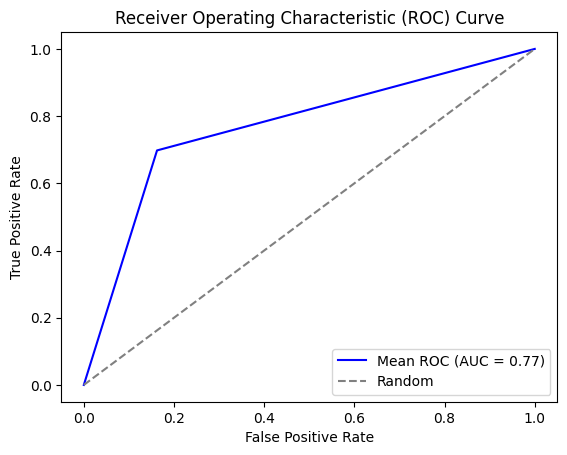

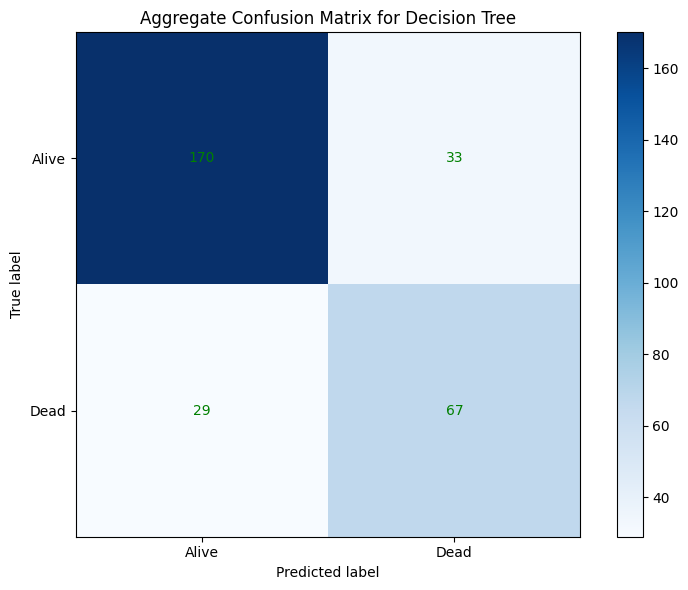

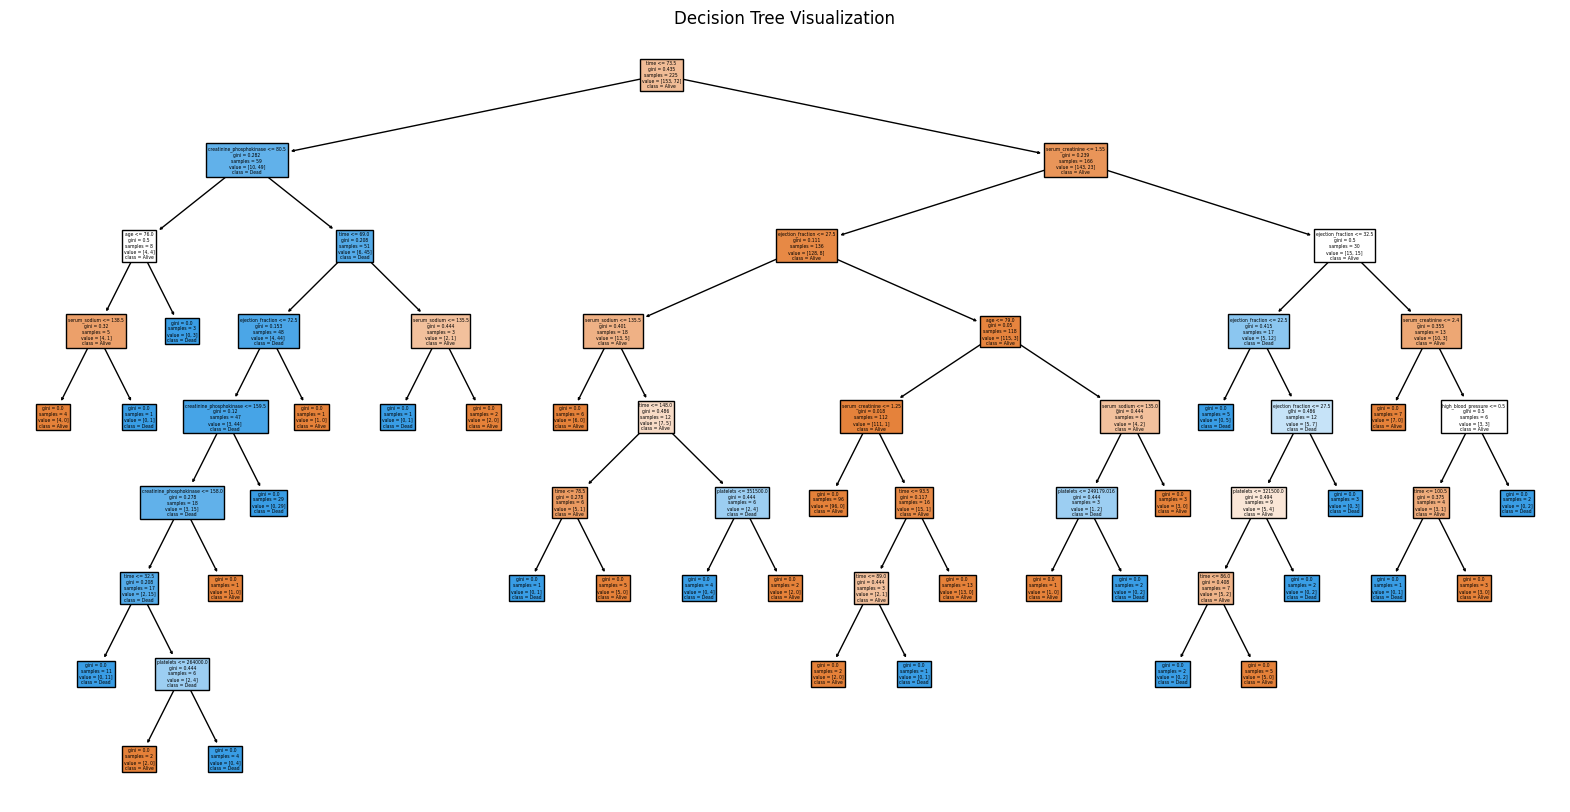

Feature Importances:
1. time: 0.5501066966266127
2. serum_creatinine: 0.1153003468873783
3. ejection_fraction: 0.09850517439725731
4. platelets: 0.08429297644983919
5. serum_sodium: 0.05775689905591865
6. creatinine_phosphokinase: 0.041968379384167094
7. age: 0.036750899747846406
8. high_blood_pressure: 0.015318627450980393
9. smoking: 0.0
10. sex: 0.0
11. diabetes: 0.0
12. anaemia: 0.0


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd

accuracy_scores = []
conf_matrices = []
fpr_all = []
tpr_all = []
auc_all = []

combined_true_labels = []
combined_predictions = []


model = DecisionTreeClassifier()

FOLDS = import_data_kfolds()

for ifold, fold in enumerate(FOLDS):
    X_train = fold['X_train']
    X_test = fold['X_test']
    y_train = fold['y_train']
    y_test = fold['y_test']


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    combined_true_labels.extend(y_test)
    combined_predictions.extend(y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    fpr_all.append(fpr)
    tpr_all.append(tpr)
    auc_all.append(auc(fpr, tpr))

    print(f"Fold {ifold + 1}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"AUC: {auc(fpr, tpr):.2f}")
    print("-" * 30)

avg_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy across {len(FOLDS)} folds: {avg_accuracy:.2f}")

avg_conf_matrix = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix)

aggregate_conf_matrix = confusion_matrix(combined_true_labels, combined_predictions)
print("Aggregate Confusion Matrix:")
print(aggregate_conf_matrix)

#plt.figure(figsize=(30, 15))
#plot_tree(model, filled=True, feature_names=feature_names, class_names=['Alive', 'Dead'])
#plt.title('Decision Tree Visualization')
#plt.savefig('decision_tree_high_resolution.png', dpi=300)

mean_fpr = np.mean(fpr_all, axis=0)
mean_tpr = np.mean(tpr_all, axis=0)
mean_auc = np.mean(auc_all)
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

combined_conf_matrix = confusion_matrix(combined_true_labels, combined_predictions)
plt.figure(figsize=(8, 6))
plt.imshow(combined_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Aggregate Confusion Matrix for Decision Tree')
plt.colorbar()

classes = ['Alive', 'Dead']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(combined_conf_matrix[i, j]), ha='center', va='center', color='green')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

heart_failure_clinical_records = fetch_ucirepo(id=519)
df = pd.DataFrame(heart_failure_clinical_records.data.features, columns=heart_failure_clinical_records.feature_names)

feature_names = df.columns

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=['Alive', 'Dead'])
plt.title('Decision Tree Visualization')
plt.savefig('decision_tree_high_resolution.png', dpi=1200)  # Adjust dpi for higher resolution

plt.show()

feature_importances = model.feature_importances_

sorted_feature_indices = np.argsort(feature_importances)[::-1]

print("Feature Importances:")
for i, idx in enumerate(sorted_feature_indices):
    print(f"{i + 1}. {feature_names[idx]}: {feature_importances[idx]}")






# K Nearest Neighbors

k=3
0.5719063545150501
[[151  52]
 [ 76  20]]
Confusion matrix, without normalization


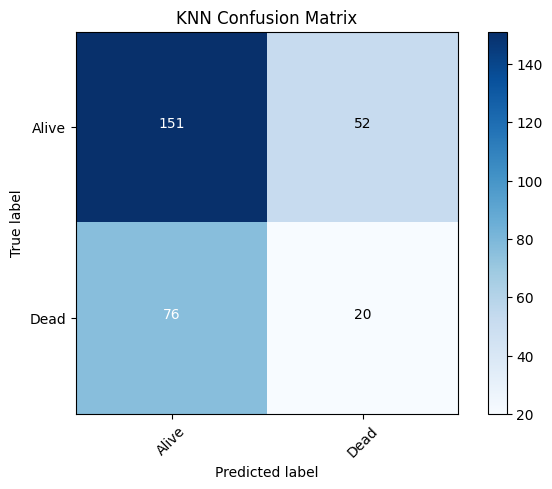

Normalized confusion matrix


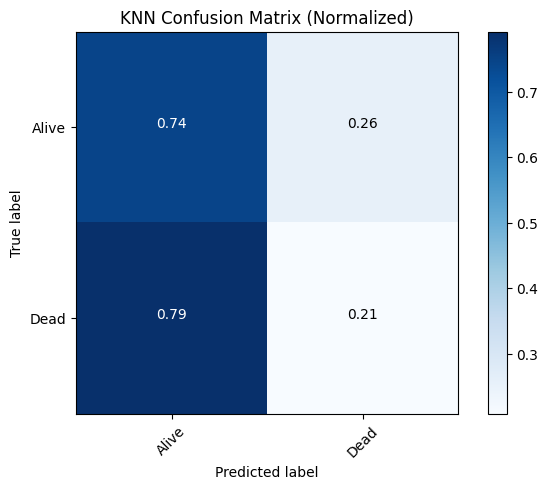

k=5
0.6053511705685619
[[164  39]
 [ 79  17]]
Confusion matrix, without normalization


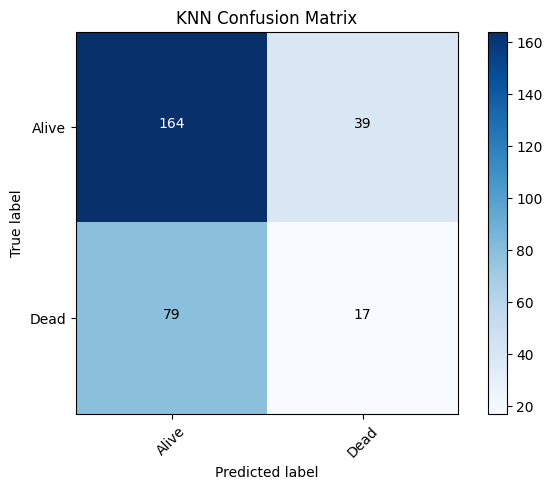

Normalized confusion matrix


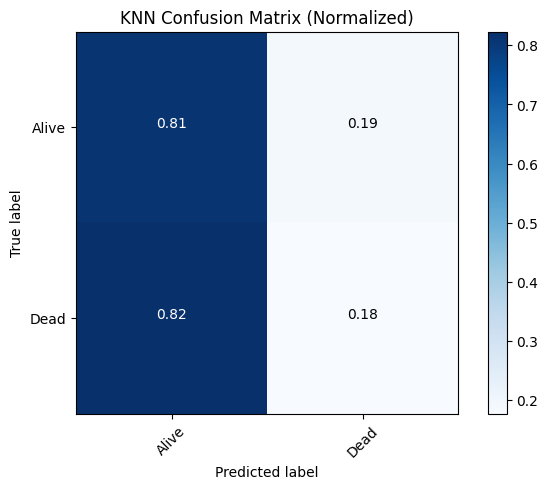

k=10
0.6688963210702341
[[195   8]
 [ 91   5]]
Confusion matrix, without normalization


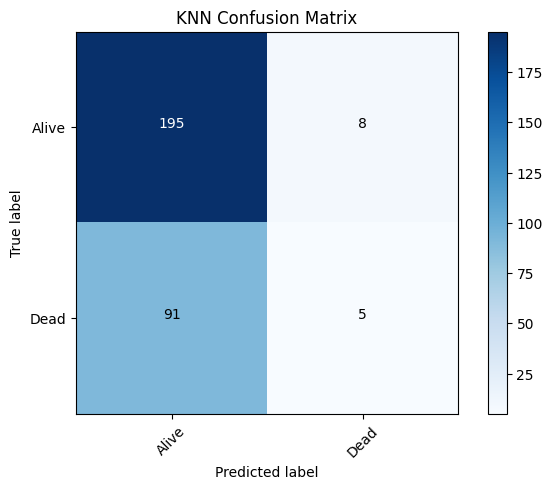

Normalized confusion matrix


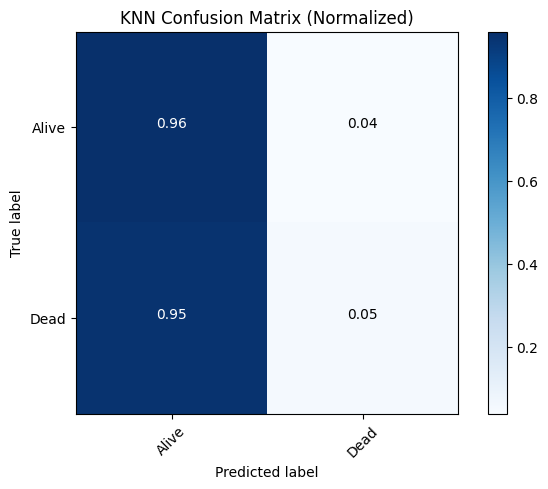

k=15
0.6521739130434783
[[193  10]
 [ 94   2]]
Confusion matrix, without normalization


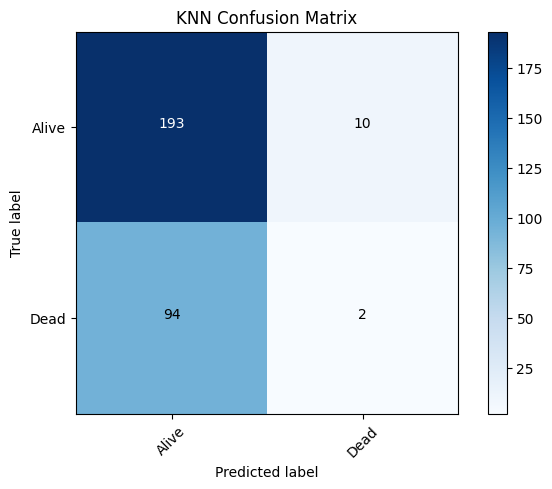

Normalized confusion matrix


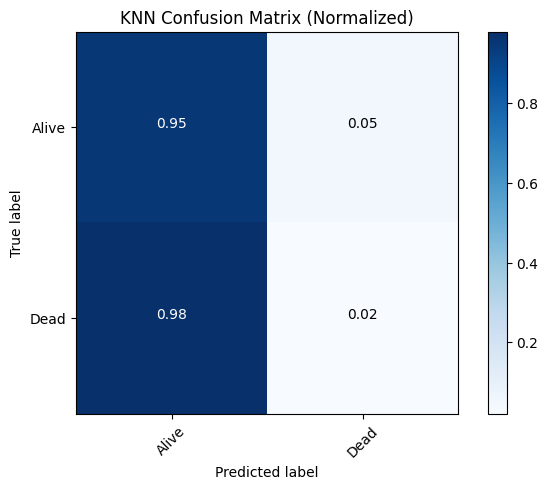

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

k_values = [3, 5, 10, 15]
predicted_labels_dict = {k: [] for k in k_values}
y_test_dict={k: [] for k in k_values}

def KNN(X_train, X_test, y_train, y_test, k_values):
    accuracy_scores = []
    confusion_matrices = []

    for i, k in enumerate(k_values):
      knn_classifier = KNeighborsClassifier(n_neighbors=k)
      knn_classifier.fit(X_train, y_train)
      y_pred = knn_classifier.predict(X_test)
      predicted_labels_dict[k].extend(y_pred)
      y_test_dict[k].extend(y_test)
    return predicted_labels_dict, y_test_dict

FOLDS = import_data_kfolds()
for ifold,fold in enumerate(FOLDS):
  X_train = fold['X_train']
  X_test = fold['X_test']
  y_train = fold['y_train']
  y_test = fold['y_test']
  predicted_labels_dict, y_test_dict = KNN(X_train, X_test, y_train, y_test, k_values)

for k in k_values:
  print(f"k={k}")
  accuracy=accuracy_score(y_test_dict[k], predicted_labels_dict[k])
  print(accuracy)
  cm=confusion_matrix(y_test_dict[k], predicted_labels_dict[k])
  print(cm)
  plot_confusion_matrix(cm,title="KNN Confusion Matrix")


Linear Discriminant Analysis

<ipython-input-25-c540f264bec4>:123: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


foldNumber is:  0
Confusion Matrix is: 
[[47  4]
 [12 12]]
Accuracy Rate is:  0.7866666666666666


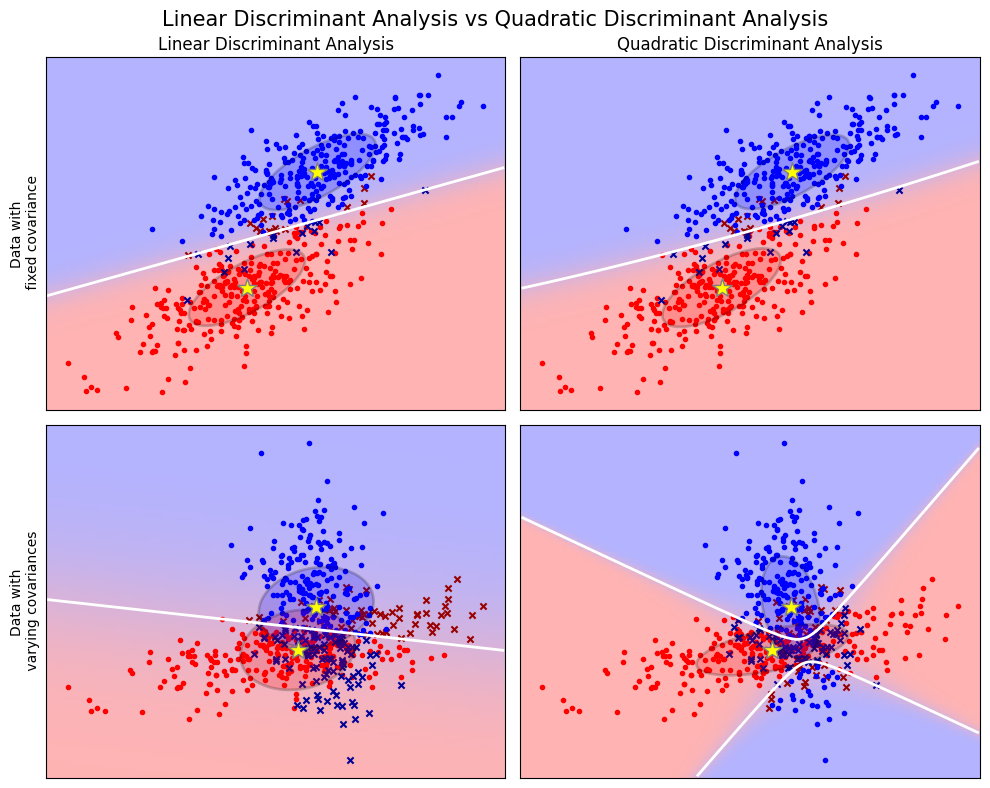

Feature 1: age : 0.0571
Feature 2: anaemia : 0.0030
Feature 3: creatinine_phosphokinase : 0.0004
Feature 4: diabetes : 0.2632
Feature 5: ejection_fraction : -0.0839
Feature 6: high_blood_pressure : -0.2563
Feature 7: platelets : -0.0000
Feature 8: serum_creatinine : 0.4995
Feature 9: serum_sodium : -0.0619
Feature 10: sex : -0.8824
Feature 11: smoking : 0.2097
Feature 12: time : -0.0229
foldNumber is:  1
Confusion Matrix is: 
[[47  4]
 [ 4 20]]
Accuracy Rate is:  0.8933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


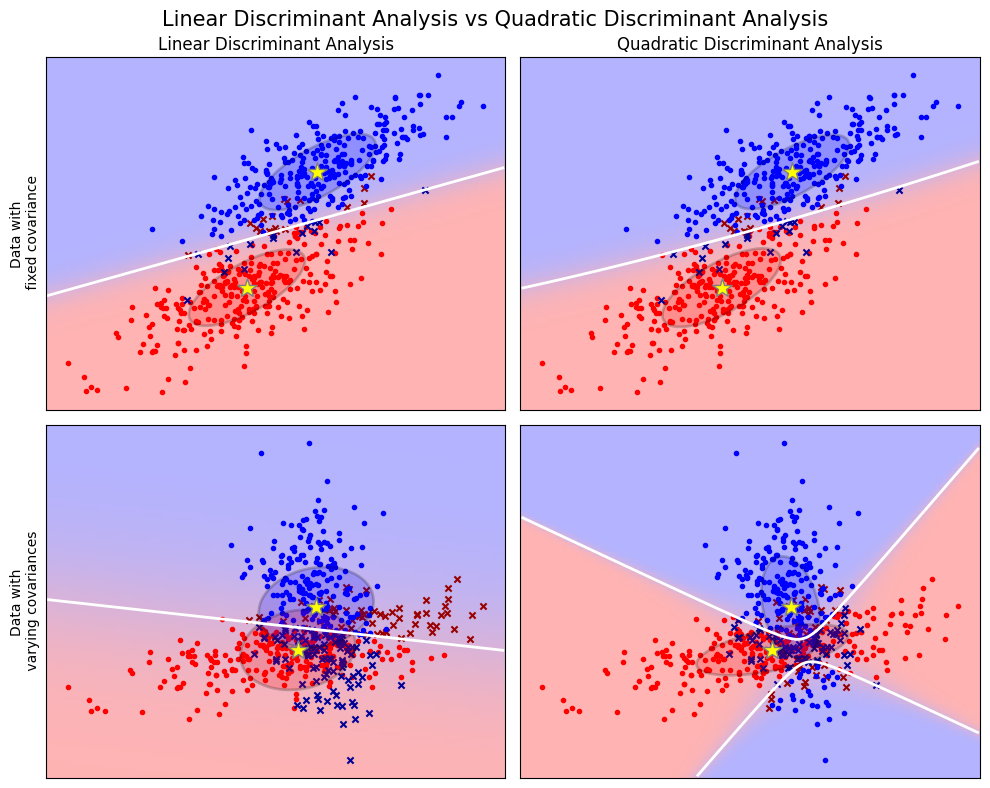

Feature 1: age : 0.0473
Feature 2: anaemia : 0.0043
Feature 3: creatinine_phosphokinase : 0.0002
Feature 4: diabetes : -0.0446
Feature 5: ejection_fraction : -0.0721
Feature 6: high_blood_pressure : -0.3176
Feature 7: platelets : -0.0000
Feature 8: serum_creatinine : 0.6367
Feature 9: serum_sodium : -0.0615
Feature 10: sex : -0.1652
Feature 11: smoking : -0.2975
Feature 12: time : -0.0189
foldNumber is:  2
Confusion Matrix is: 
[[42  9]
 [ 4 20]]
Accuracy Rate is:  0.8266666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


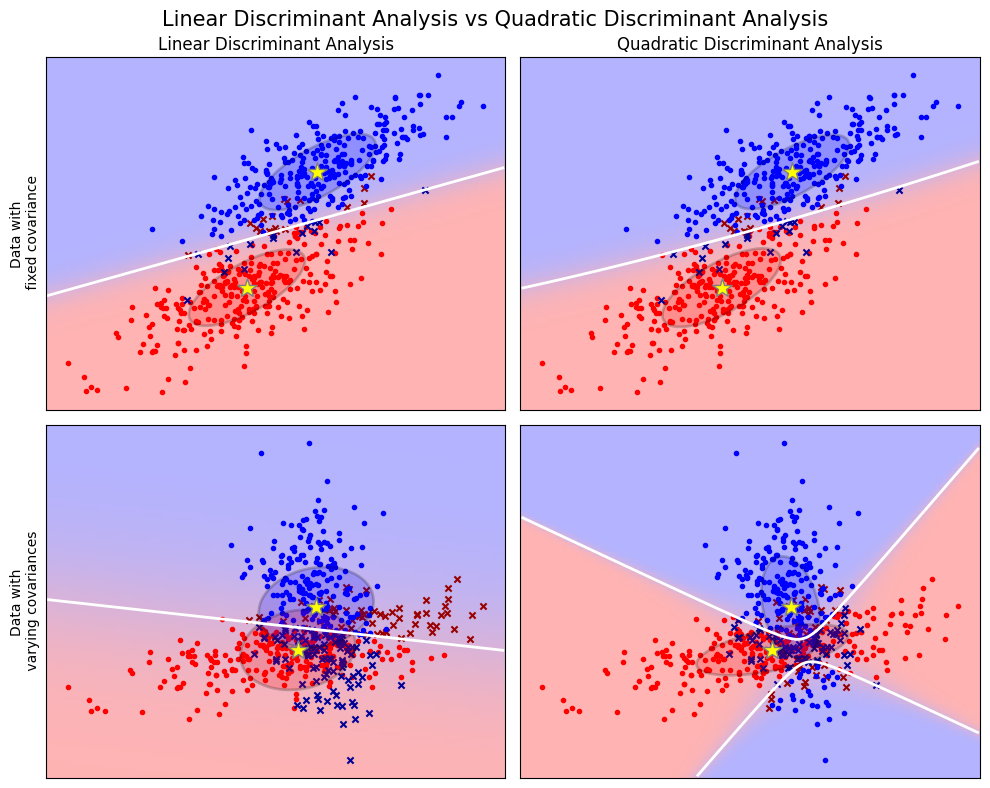

Feature 1: age : 0.0387
Feature 2: anaemia : 0.0025
Feature 3: creatinine_phosphokinase : 0.0002
Feature 4: diabetes : 0.4014
Feature 5: ejection_fraction : -0.0716
Feature 6: high_blood_pressure : 0.2892
Feature 7: platelets : -0.0000
Feature 8: serum_creatinine : 0.6885
Feature 9: serum_sodium : -0.0794
Feature 10: sex : -0.1860
Feature 11: smoking : -0.3842
Feature 12: time : -0.0218
foldNumber is:  3
Confusion Matrix is: 
[[46  4]
 [10 14]]
Accuracy Rate is:  0.8108108108108109


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


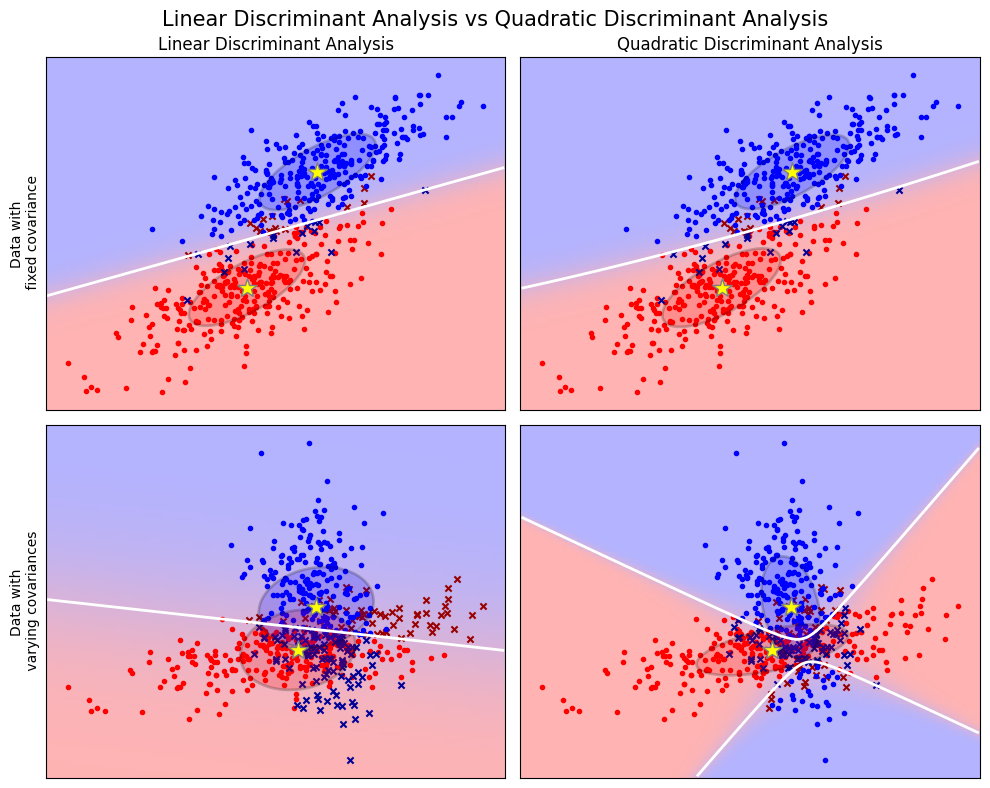

Feature 1: age : 0.0429
Feature 2: anaemia : -0.0791
Feature 3: creatinine_phosphokinase : 0.0001
Feature 4: diabetes : -0.0211
Feature 5: ejection_fraction : -0.0837
Feature 6: high_blood_pressure : -0.1204
Feature 7: platelets : -0.0000
Feature 8: serum_creatinine : 0.8704
Feature 9: serum_sodium : -0.0460
Feature 10: sex : -0.7255
Feature 11: smoking : 0.3618
Feature 12: time : -0.0230
tn is:  182
fp is:  21
fn is:  30
tp is:  66
Summed Confusion Matrix is: 
[[182  21]
 [ 30  66]]
Averaged Accuracy Rate is:  0.8294314381270903
Confusion matrix, without normalization


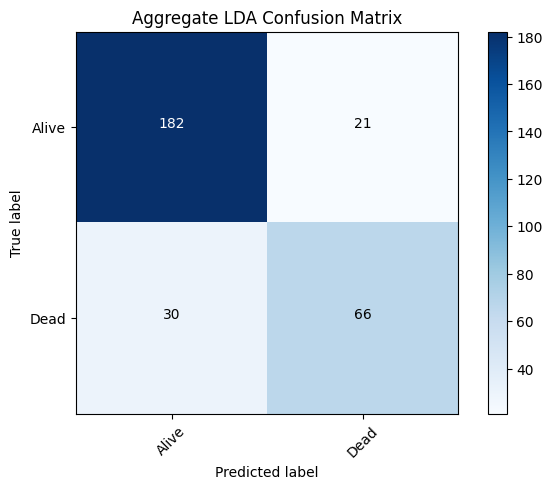

Normalized confusion matrix


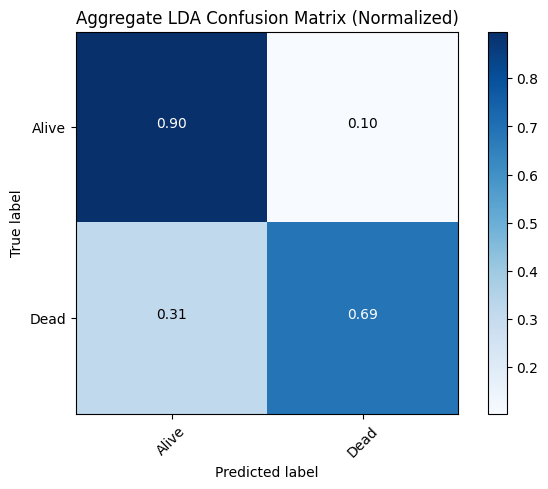

In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

from scipy import linalg

def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
        plt.ylabel("Data with\n fixed covariance")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")
    elif fig_index == 3:
        plt.ylabel("Data with\n varying covariances")

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099"
    )  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes_2",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)


def dataset_fixed_cov():
  """Generate 2 Gaussians samples with the same covariance matrix"""
  n, dim = 300, 2
  np.random.seed(0)
  C = np.array([[0.0, -0.23], [0.83, 0.23]])
  X = np.r_[
    np.dot(np.random.randn(n, dim), C),
    np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
  ]
  y = np.hstack((np.zeros(n), np.ones(n)))
  return X, y


def dataset_cov():
  """Generate 2 Gaussians samples with different covariance matrices"""
  n, dim = 300, 2
  np.random.seed(0)
  C = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
  X = np.r_[
    np.dot(np.random.randn(n, dim), C),
    np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4]),
  ]
  y = np.hstack((np.zeros(n), np.ones(n)))
  return X, y

#THIS INCORPORATES FOLDS
def LDA (FOLDS,reducedModel):
  #Initialize tracking variables which are updated with each iteration of the for loop.
  tn = 0
  fp = 0
  fn = 0
  tp = 0
  listOfConfusionMatrices = []
  for foldNumber in range(0,len(FOLDS)):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    print('foldNumber is: ', foldNumber)
    #print('reducedModel is: ', reducedModel)
    # Gather Train data
    newXTrain = pd.DataFrame(FOLDS[foldNumber]['X_train'],
                            columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                                      'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                                      'smoking', 'time'])
    newYTrain = pd.DataFrame(FOLDS[foldNumber]['y_train'], columns=['DEATH_EVENT'])
    allTrain = pd.concat([newXTrain, newYTrain], axis=1)

    # Gather Test data
    newXtest = pd.DataFrame(FOLDS[foldNumber]['X_test'],
                            columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                                    'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
                                    'smoking', 'time'])
    newYtest = pd.DataFrame(FOLDS[foldNumber]['y_test'], columns=['DEATH_EVENT'])
    allTest = pd.concat([newXtest, newYtest], axis=1)
    #Fit LDA model
    clf = LinearDiscriminantAnalysis()
    clf.fit(newXTrain, newYTrain)

    #Predict with fitted LDA model.
    newXtest['predicted_response'] = clf.predict(newXtest)

    #Prepare the predicted and truth comparisons
    predicted_labels = newXtest['predicted_response'].tolist()
    # print('len of predicted_labels is: ', len(predicted_labels))
    # print('len of y_test is: ', len(y_test))
    accuracyRate = accuracy_score(newYtest, predicted_labels)
    predictedAndTruth = pd.concat([newXtest['predicted_response'], pd.DataFrame(newYtest, columns=['DEATH_EVENT'])],
                                  axis=1)

    print('Confusion Matrix is: ')
    print(confusion_matrix(newYtest, predicted_labels))
    listOfConfusionMatrices.append(confusion_matrix(newYtest, predicted_labels))

    # Retrieve confusion matrix values
    looptn, loopfp, loopfn, looptp = confusion_matrix(newYtest, predicted_labels).ravel()

    # Update confusion matrix values.
    tn = tn + looptn
    fp = fp + loopfp
    fn = fn + loopfn
    tp = tp + looptp

    # Return accuracy rate
    print('Accuracy Rate is: ', accuracyRate)

    plt.figure(figsize=(10, 8), facecolor="white")
    plt.suptitle(
      "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
      y=0.98,
      fontsize=15,
    )

    from sklearn.discriminant_analysis import (
      LinearDiscriminantAnalysis,
      QuadraticDiscriminantAnalysis,
    )

    # covariance_matrices = clf.covariance_
    # print('Covariance matrices are: ', covariance_matrices)
    #
    # if len(set(map(tuple, covariance_matrices))) == 1:
    #     print("Covariance matrices are shared.")
    # else:
    #     print("Covariance matrices are varied.")

    #Use this loop to output the classes and their separation for the training data.
    for i, (newXTrain, newYTrain) in enumerate([dataset_fixed_cov(), dataset_cov()]):
      # Linear Discriminant Analysis
      lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
      y_pred = lda.fit(newXTrain, newYTrain).predict(newXTrain)
      splot = plot_data(lda, newXTrain, newYTrain, y_pred, fig_index=2 * i + 1)
      plot_lda_cov(lda, splot)
      plt.axis("tight")

      # Quadratic Discriminant Analysis - not really needed
      qda = QuadraticDiscriminantAnalysis(store_covariance=True)
      y_pred = qda.fit(newXTrain, newYTrain).predict(newXTrain)
      splot = plot_data(qda, newXTrain, newYTrain, y_pred, fig_index=2 * i + 2)
      plot_qda_cov(qda, splot)
      plt.axis("tight")



    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

    #Output the coefficients
    feature_names = allTrain.columns
    coefficients = clf.coef_
    for i, (feature, coefficient) in enumerate(zip(feature_names, coefficients[0])):
        print(f"Feature {i + 1}: {feature} : {coefficient:.4f}")




  #Print components to the confusion matrices
  print('tn is: ', tn)
  print('fp is: ', fp)
  print('fn is: ', fn)
  print('tp is: ', tp)

  #structure is [tn, fp], pfn, tp]
  # averagedConfusionMatrix = [[tn/4, fp/4],[fn/4, tp/4]]
  # print('Averaged Confusion Matrix is: ')
  # print(np.matrix(averagedConfusionMatrix))

  #Print the confusion matrix across the 4 folds.
  summedConfusionMatrix = [[tn, fp],[fn, tp]]
  print('Summed Confusion Matrix is: ')
  print(np.matrix(summedConfusionMatrix))

  print('Averaged Accuracy Rate is: ', (tn + tp)/(tn + tp + fn + fp))

  plot_confusion_matrix(sum(listOfConfusionMatrices), title="Aggregate LDA Confusion Matrix")






#Call LDA function
LDA(FOLDS,False)

